In [89]:

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import SAC
from DSAC import DSAC

def evaluate_model(model,env):
    done = False
    rewards = []
    portfolio_worths = []
    obs = env.reset()
    portfolio_worths.append(1.0)
    max_worth = 1.0
    weights = []
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done,info = env.step(action)
        current_worth = info[0]['portfolio_worth']
        portfolio_worths.append(current_worth)
        max_worth = max(max_worth,current_worth)
        weights.append(info[0]['weights'])
        rewards.append(reward)
    return np.array(rewards),np.array(portfolio_worths),np.array(weights)

def calculate_portfolio_metrics(eval_benchmark, portfolio_worths):
    
    quarter = 63 # 63 trading days in a quarter
    
    periodic_portfolio_worths = portfolio_worths[::quarter]
    
    periodic_portfolio_returns = np.log(periodic_portfolio_worths[1:]/periodic_portfolio_worths[:-1])
    sharpe_ratio = np.mean(periodic_portfolio_returns)/np.std(periodic_portfolio_returns)
    
    periodic_benchmark_worths = eval_benchmark[::quarter]
    periodic_benchmark_returns = np.log(periodic_benchmark_worths[1:]/periodic_benchmark_worths[:-1])
    excess_returns = periodic_portfolio_returns - periodic_benchmark_returns
    information_ratio = np.mean(excess_returns)/np.std(excess_returns)
    
    drawdowns = (np.maximum.accumulate(periodic_portfolio_worths) - periodic_portfolio_worths)/np.maximum.accumulate(periodic_portfolio_worths)
    max_drawdown = np.max(drawdowns)
    
    print(f'Sharpe Ratio: {sharpe_ratio},  Information Ratio: {information_ratio}, Final Portfolio Worth: {portfolio_worths[-1]}, Max Drawdown: {max_drawdown}')

def evaluate_portfolio(eval_env, eval_benchmark, model):
    rewards,portfolio_worths,weights = evaluate_model(model,eval_env)
    calculate_portfolio_metrics(eval_benchmark, portfolio_worths)
    return portfolio_worths,weights


In [90]:
from std_methods import std_methods

tickers = ['AAPL','JPM','F','PG', 'BA','IBM','XOM']

equal_weights,min_risk,risk_parity = std_methods(tickers,'2015-01-01','2020-18-31','2021-01-01','2024-12-31')

from environments.util import fetch_observations
from environments.benchmark import create_env_benchmark

investment_period = 1 # each 1 investment days 
reward_period = 15 # each 15 investment periods
prices,eval_benchmark,observations,eval_dates = fetch_observations(tickers,investment_period,'2021-01-01','2024-12-31')

eval_env = create_env_benchmark(prices,eval_benchmark,observations,20,0)

print('Equal Weights')
calculate_portfolio_metrics(eval_benchmark, equal_weights)
print('Min Risk')
calculate_portfolio_metrics(eval_benchmark, min_risk)
print('Risk Parity')
calculate_portfolio_metrics(eval_benchmark, risk_parity)



[2.00194566e-02 3.82803518e-02 8.92097432e-01 4.96027596e-02
 4.81274464e-14 9.30312935e-13 0.00000000e+00]
[1.04750303e-02 1.30762920e-02 9.00893980e-01 1.81269452e-02
 7.01410221e-04 2.80720866e-02 2.86542556e-02]
Equal Weights
Sharpe Ratio: 0.42942711795056454,  Information Ratio: 0.2957192367177769, Final Portfolio Worth: 1.658745598828538, Max Drawdown: 0.1911770928919458
Min Risk
Sharpe Ratio: 0.07233928108839598,  Information Ratio: -0.03676890834417772, Final Portfolio Worth: 1.3161702986084967, Max Drawdown: 0.47960936902118073
Risk Parity
Sharpe Ratio: 0.0873537644358698,  Information Ratio: -0.021340157611081326, Final Portfolio Worth: 1.3597831532743663, Max Drawdown: 0.4643444573752519


In [91]:
def evaluate_SAC(model_path):
    model = SAC.load(f'./models/{model_path}.zip')
    return evaluate_portfolio(eval_env, eval_benchmark, model)

def evaluate_DSAC(model_path):
    bare_model = DSAC(policy='MlpPolicy', env=eval_env, verbose=1)
    bare_model.set_parameters(f'./models/{model_path}.zip')
    return evaluate_portfolio(eval_env, eval_benchmark, bare_model)

DSAC paper
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.61GB > 1.02GB
  warnings.warn(


Sharpe Ratio: 0.23298820859506592,  Information Ratio: -0.0064708857198310455, Final Portfolio Worth: 1.4259875529768093, Max Drawdown: 0.25236526109653573
DSAC benchmark 0
Using cpu device
Sharpe Ratio: 0.4028045368760925,  Information Ratio: 0.1802314396812937, Final Portfolio Worth: 1.706577381291123, Max Drawdown: 0.11947060007039176
DSAC benchmark 0.25
Using cpu device
Sharpe Ratio: -0.07938611068997219,  Information Ratio: -0.46281143064497826, Final Portfolio Worth: 0.9158888772220352, Max Drawdown: 0.24411527118452428
DSAC benchmark 0.5
Using cpu device
Sharpe Ratio: 0.26010290560478544,  Information Ratio: 0.028468210438790977, Final Portfolio Worth: 1.3473892219328996, Max Drawdown: 0.15674627298126645
DSAC benchmark 0.75
Using cpu device
Sharpe Ratio: 0.4051268227272632,  Information Ratio: 0.21970894510577535, Final Portfolio Worth: 1.5637305769154877, Max Drawdown: 0.1513491402287304
DSAC benchmark 1
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.61GB > 1.04GB
  warnings.warn(


Sharpe Ratio: 0.36598414569833754,  Information Ratio: 0.20539347548493334, Final Portfolio Worth: 1.7548465661675727, Max Drawdown: 0.248388693845403
DSAC max gain 0
Using cpu device
Sharpe Ratio: 0.2449928941493489,  Information Ratio: 0.03998525013975674, Final Portfolio Worth: 1.458131736118928, Max Drawdown: 0.2651387327637341
DSAC max gain 0.25
Using cpu device
Sharpe Ratio: -0.0017429432668009716,  Information Ratio: -0.21600289804483283, Final Portfolio Worth: 1.0406894892234422, Max Drawdown: 0.4067631440471657
DSAC max gain 0.5
Using cpu device
Sharpe Ratio: 0.2642038403504579,  Information Ratio: 0.04393229453727777, Final Portfolio Worth: 1.4457073676510943, Max Drawdown: 0.16724941926545994
DSAC max gain 0.75
Using cpu device


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.61GB > 1.03GB
  warnings.warn(


Sharpe Ratio: 0.26263714789317316,  Information Ratio: 0.025265323640649373, Final Portfolio Worth: 1.4292256044852691, Max Drawdown: 0.22577583901995202
DSAC max gain 1
Using cpu device
Sharpe Ratio: 0.4392164911472102,  Information Ratio: 0.2464336664575102, Final Portfolio Worth: 1.7791516154436093, Max Drawdown: 0.15964275761864122


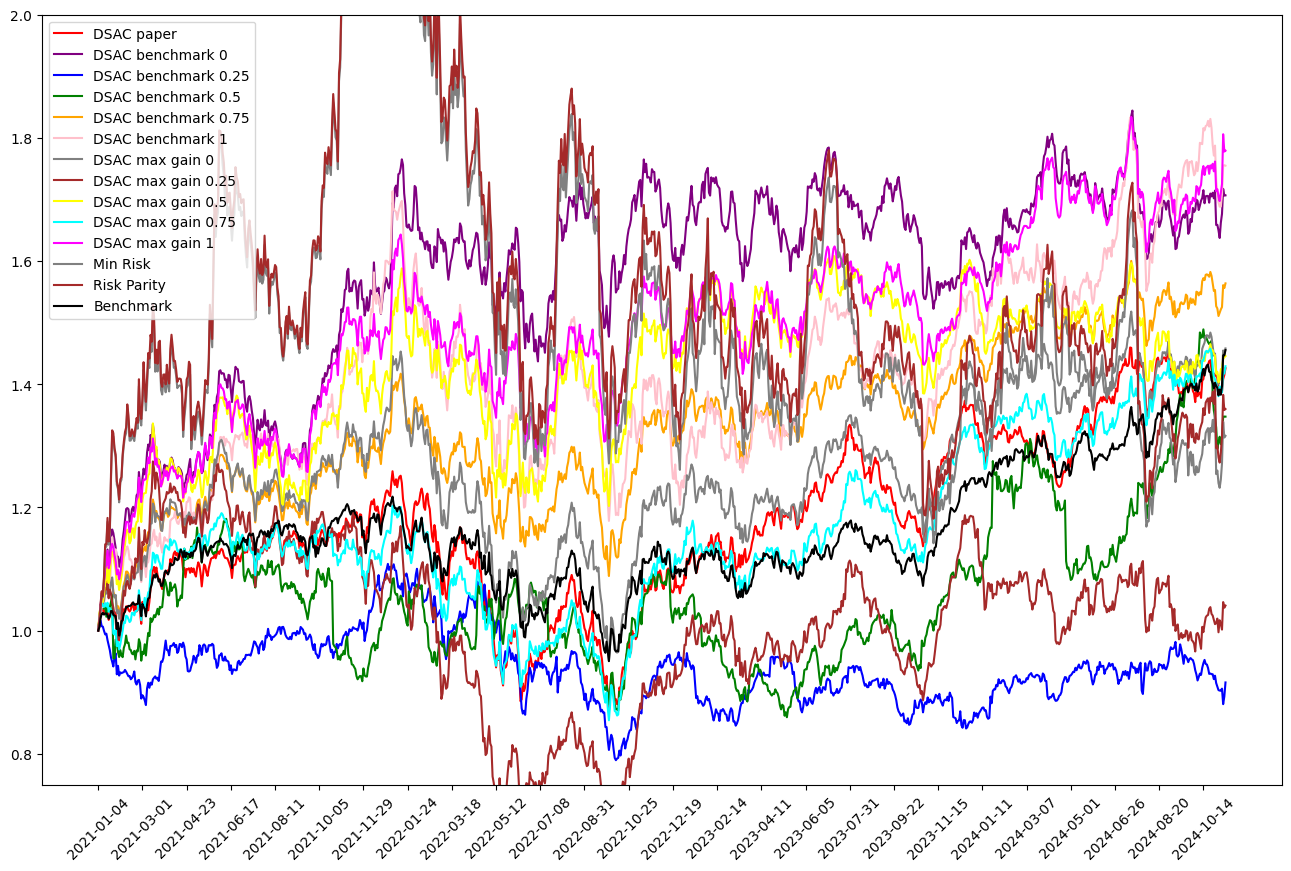

In [92]:
models = {
    'DSAC paper': 'DSAC_env_0',
    'DSAC benchmark 0': 'DSAC_env_1',
    'DSAC benchmark 0.25': 'DSAC_env_2',
    'DSAC benchmark 0.5': 'DSAC_env_3',
    'DSAC benchmark 0.75': 'DSAC_env_4',
    'DSAC benchmark 1': 'DSAC_env_5',
    'DSAC max gain 0': 'DSAC_env_6',
    'DSAC max gain 0.25': 'DSAC_env_7',
    'DSAC max gain 0.5': 'DSAC_env_8',
    'DSAC max gain 0.75': 'DSAC_env_9',
    'DSAC max gain 1':  'DSAC_env_10',
}

plt.figure(figsize=(16,10))
i = 0

colors = ['red','purple','blue','green','orange','pink','gray','brown','yellow','cyan','magenta']

for model_name,model_path in models.items():
    print(model_name)
    if 'DSAC' in model_path:
        portfolio_worths,weights = evaluate_DSAC(model_path)
    else:
        portfolio_worths,weights = evaluate_SAC(model_path)
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}', color = colors[i])
    
    weights = np.vstack((weights,np.tile(weights[-1],(len(eval_dates)-weights.shape[0],1))))
    i += 1
        
eval_benchmark_relative = eval_benchmark/eval_benchmark[0]

plt.plot(eval_dates,min_risk, linestyle='-',label='Min Risk', color = 'grey')
plt.plot(eval_dates,risk_parity, linestyle='-',label='Risk Parity', color = 'brown')

plt.plot(eval_dates,eval_benchmark_relative, linestyle='-',label='Benchmark', color = 'black')


plt.xticks(eval_dates[::(len(eval_dates)//25)],rotation=45)
plt.ylim(0.75,2)
plt.legend()